<a href="https://colab.research.google.com/github/lucasoliveira13/Digital_Image_Processing/blob/main/PDI_atividade_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image
import os
from collections import Counter
import cv2
from scipy.signal import convolve2d

drive.mount('/content/drive')
dataset = '/content/drive/MyDrive/PDI/atividade_7'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Questão 1

In [ ]:
def segmentar_linhas(imagem):
    #Cálculo dos gradientes horizontais e verticais
    gradiente_x = cv2.Sobel(imagem, cv2.CV_64F, 1, 0, ksize=3)
    gradiente_y = cv2.Sobel(imagem, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(gradiente_x ** 2 + gradiente_y ** 2)

    #Limiarização após o cálculo do gradiente
    limiar = 0.2 * np.max(magnitude)
    imagem_binaria = np.where(magnitude > limiar, 255, 0).astype(np.uint8)

    #Refinamento das bordas
    kernel = np.ones((2, 2), np.uint8)
    imagem_binaria = cv2.erode(imagem_binaria, kernel, iterations=1)
    imagem_binaria = cv2.dilate(imagem_binaria, kernel, iterations=1)

    #Aplicar a transformada Hough para detectar as linhas na imagem binária
    limiar_hough = int(limiar)
    linhas = cv2.HoughLines(imagem_binaria, 1, np.pi / 180, limiar_hough)

    return imagem_binaria

Text(0.5, 1.0, 'Resultado')

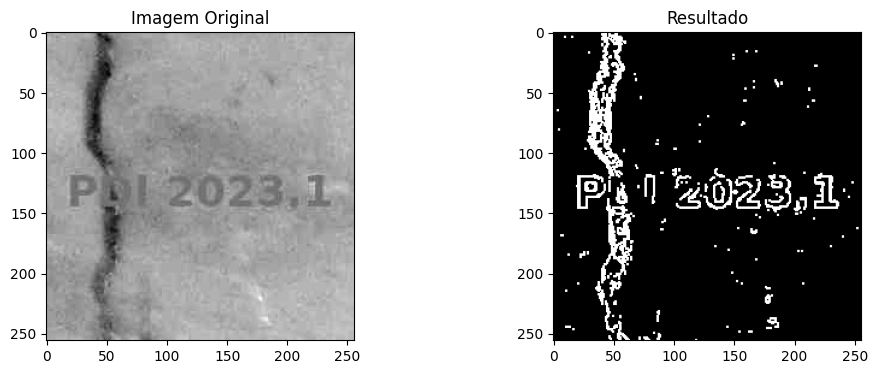

In [ ]:
imagem = plt.imread('/content/drive/MyDrive/PDI/atividade_7/S1.jpg')
resultado = segmentar_linhas(imagem)
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].imshow(imagem, cmap='gray')
axs[0].set_title('Imagem Original')

axs[1].imshow(resultado, cmap='gray')
axs[1].set_title('Resultado')

##Questão 2

In [ ]:
def sobel_edge_detection(imagem):

    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.int32)
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.int32)

    grad_x = np.abs(convolve2d(imagem, sobel_x, mode='same'))
    grad_y = np.abs(convolve2d(imagem, sobel_y, mode='same'))
    gradientes = np.sqrt(grad_x**2 + grad_y**2).astype(np.uint8)

    return gradientes

imagem = plt.imread('/content/drive/MyDrive/PDI/atividade_7/S2.jpg')
gradientes = sobel_edge_detection(imagem)
mask = np.zeros(imagem.shape)
mask[gradientes > 100] = 1

mask_2 = np.zeros(imagem.shape)
mask_2[gradientes > 45] = 1

mask_3 = np.zeros(imagem.shape)
mask_3[gradientes > 60] = 1

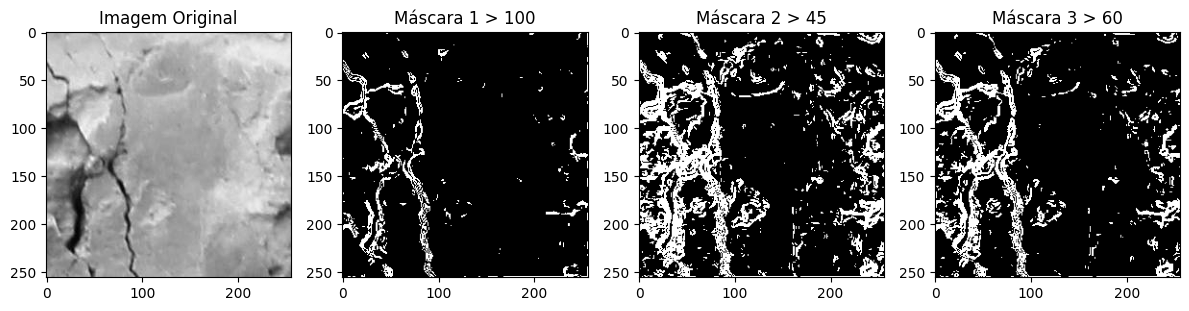

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

axs[0].imshow(imagem, cmap='gray')
axs[0].set_title('Imagem Original')

axs[1].imshow(mask, cmap='gray')
axs[1].set_title('Máscara 1 > 100')

axs[2].imshow(mask_2, cmap='gray')
axs[2].set_title('Máscara 2 > 45')

axs[3].imshow(mask_3, cmap='gray')
axs[3].set_title('Máscara 3 > 60')

plt.tight_layout()

plt.show()

##Questão 3

In [ ]:
def otsu_thresholding(imagem):

    hist, bins = np.histogram(imagem, bins=256, range=[0, 256])

    total_pixels = imagem.shape[0] * imagem.shape[1]

    max_variance = 0
    threshold = 0

    for t in range(256):
        prob_bg = np.sum(hist[:t]) / total_pixels
        prob_fg = np.sum(hist[t:]) / total_pixels

        mean_bg = np.sum(np.arange(t) * hist[:t]) / np.sum(hist[:t]) if prob_bg > 0 else 0
        mean_fg = np.sum(np.arange(t, 256) * hist[t:]) / np.sum(hist[t:]) if prob_fg > 0 else 0

        variance = prob_bg * prob_fg * (mean_bg - mean_fg) ** 2

        if variance > max_variance:
            max_variance = variance
            threshold = t

    imagem_binarizada = (imagem > threshold).astype(np.uint8) * 255

    return imagem_binarizada


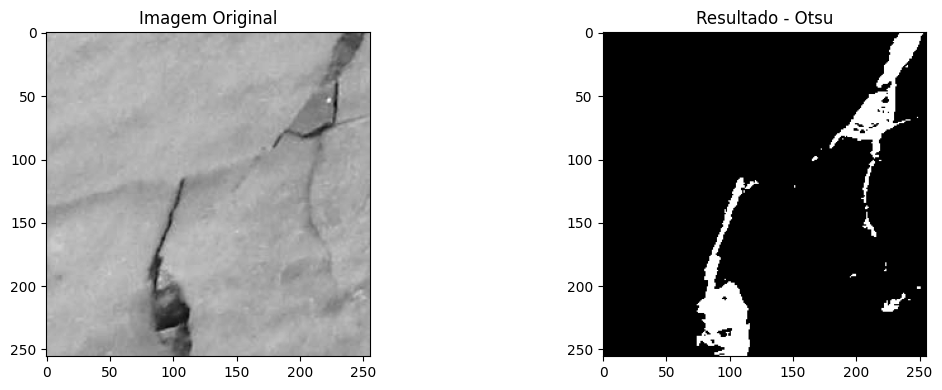

In [ ]:
imagem = plt.imread('/content/drive/MyDrive/PDI/atividade_7/S3.jpg')
resultado = 255 - otsu_thresholding(imagem)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].imshow(imagem, cmap='gray')
axs[0].set_title('Imagem Original')

axs[1].imshow(resultado, cmap='gray')
axs[1].set_title('Resultado - Otsu')

plt.tight_layout()

plt.show()


##Questão 4

In [ ]:
def segmentacao_limiar_adaptativa(imagem, tamanho_bloco, constante_c):

    imagem_binaria = cv2.adaptiveThreshold(
        imagem, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, tamanho_bloco, constante_c
    )
    return imagem_binaria

In [ ]:
imagem = plt.imread('/content/drive/MyDrive/PDI/atividade_7/S4.jpg')
resultado = 255 - segmentacao_limiar_adaptativa(imagem,21,10)
resultado_2 = sobel_edge_detection(imagem)
resultado_3 = 255 - otsu_thresholding(imagem)
mask = np.zeros(imagem.shape)
mask[resultado_2 > 40] = 1

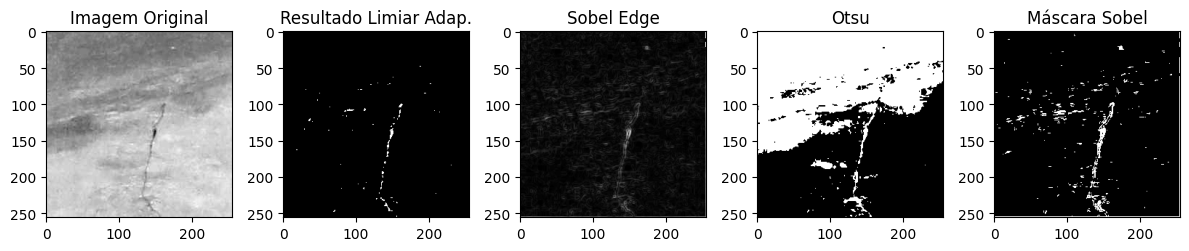

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(12, 4))

axs[0].imshow(imagem, cmap='gray')
axs[0].set_title('Imagem Original')

axs[1].imshow(resultado, cmap='gray')
axs[1].set_title('Resultado Limiar Adap.')

axs[2].imshow(resultado_2, cmap='gray')
axs[2].set_title('Sobel Edge')

axs[3].imshow(resultado_3, cmap='gray')
axs[3].set_title('Otsu')

axs[4].imshow(mask, cmap='gray')
axs[4].set_title('Máscara Sobel')

plt.tight_layout()

plt.show()

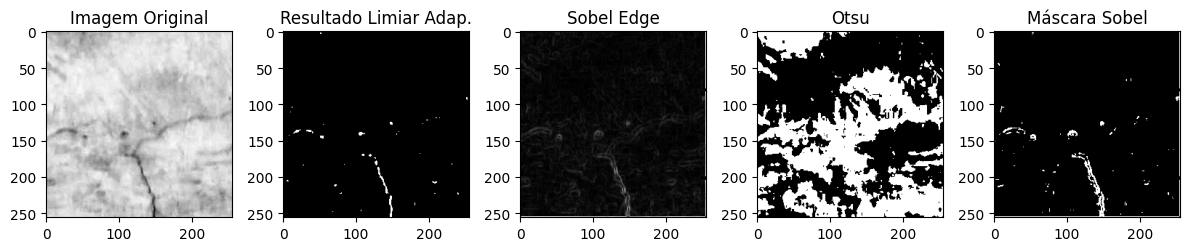

In [ ]:
imagem = plt.imread('/content/drive/MyDrive/PDI/atividade_7/S5.jpg')
resultado = 255 - segmentacao_limiar_adaptativa(imagem,21,10)
resultado_2 = sobel_edge_detection(imagem)
resultado_3 = 255 - otsu_thresholding(imagem)
mask = np.zeros(imagem.shape)
mask[resultado_2 > 40] = 1

fig, axs = plt.subplots(1, 5, figsize=(12, 4))

axs[0].imshow(imagem, cmap='gray')
axs[0].set_title('Imagem Original')

axs[1].imshow(resultado, cmap='gray')
axs[1].set_title('Resultado Limiar Adap.')

axs[2].imshow(resultado_2, cmap='gray')
axs[2].set_title('Sobel Edge')

axs[3].imshow(resultado_3, cmap='gray')
axs[3].set_title('Otsu')

axs[4].imshow(mask, cmap='gray')
axs[4].set_title('Máscara Sobel')

plt.tight_layout()

plt.show()

#Questão 5

In [ ]:
from sklearn.cluster import DBSCAN

def segmentacao_kmeans(imagem, cor1, cor2, tamanho_kernel_mediana=5):
    altura, largura, _ = imagem.shape

    imagem_filtrada = cv2.medianBlur(imagem, tamanho_kernel_mediana)

    pixels = imagem_filtrada.reshape((-1, 3))

    pixels = np.float32(pixels)

    centroides = np.array([cor1, cor2], dtype=np.float32)

    criterio = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, rotulos, centroides = cv2.kmeans(pixels, 2, None, criterio, 10, cv2.KMEANS_PP_CENTERS, centroides)

    rotulos = np.uint8(rotulos)

    rotulos = rotulos.reshape((altura, largura))

    _, imagem_segmentada_binaria = cv2.threshold(rotulos, 0.5, 255, cv2.THRESH_BINARY)

    kernel = np.ones((5, 5), np.uint8)
    limiar = 10
    imagem_binaria = cv2.threshold(imagem_segmentada_binaria, limiar, 255, cv2.THRESH_BINARY)[1]

    return imagem_binaria.astype(np.uint8)



In [ ]:
def segmentacao_gradientes_morfologicos(imagem, tamanho_kernel, tamanho_kernel_dilate=3):

    gradiente_x = cv2.Sobel(imagem, cv2.CV_64F, 1, 0, ksize=tamanho_kernel)
    gradiente_y = cv2.Sobel(imagem, cv2.CV_64F, 0, 1, ksize=tamanho_kernel)

    magnitude_gradiente = np.sqrt(gradiente_x ** 2 + gradiente_y ** 2)
    magnitude_gradiente = cv2.normalize(magnitude_gradiente, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    limiar = 100
    _, imagem_binaria = cv2.threshold(magnitude_gradiente, limiar, 255, cv2.THRESH_BINARY)

    #binariza a imagem resultante para garantir apenas valores 0 ou 255
    imagem_binaria = cv2.threshold(imagem_binaria, 0, 255, cv2.THRESH_BINARY)[1]

    return imagem_binaria

###Carregando imagens

In [ ]:
mascaras_kmns = []
mascaras_morf = []
imagens_originais = []
names = []

path_dataset = '/content/drive/MyDrive/PDI/atividade_7/Dataset/DS-IM'

for nome_imagem in sorted(os.listdir(path_dataset)):
    path_imagem = os.path.join(path_dataset, nome_imagem)

    imagem = cv2.imread(path_imagem)
    imagens_originais.append(imagem)
    names.append(nome_imagem)

    mascara_segmentada = 255-segmentacao_kmeans(imagem,(0,0,0),(255,255,255))
    mascara_morf = 255-segmentacao_gradientes_morfologicos(imagem,3)

    mascaras_morf.append(mascara_morf)
    mascaras_kmns.append(mascara_segmentada)

###Carregando Ground_Truths

In [ ]:
ground_truths = []
path_dataset = '/content/drive/MyDrive/PDI/atividade_7/Dataset/DS-MASKS'

for nome_imagem in sorted(os.listdir(path_dataset)):
    path_imagem = os.path.join(path_dataset, nome_imagem)

    imagem = cv2.imread(path_imagem)
    ground_truths.append(imagem)

###Calculos de IOU e MIOU

In [ ]:
def calculate_iou(mask1, mask2):
    intersection = np.logical_and(mask1, mask2)
    union = np.logical_or(mask1, mask2)
    iou = np.sum(intersection) / np.sum(union)
    return iou

def calculate_miou(list_masks1, list_masks2):
    miou = np.mean([calculate_iou(mask1, mask2) for mask1, mask2 in zip(list_masks1, list_masks2)])
    return miou

###Resultados

Imagem 2 - IoU: 0.0460
Imagem 19 - IoU: 0.0354
Imagem 4 - IoU: 0.0205
Imagem 6 - IoU: 0.0154
Imagem 17 - IoU: 0.0133

mIoU para as 5 imagens aleatórias: 0.0261


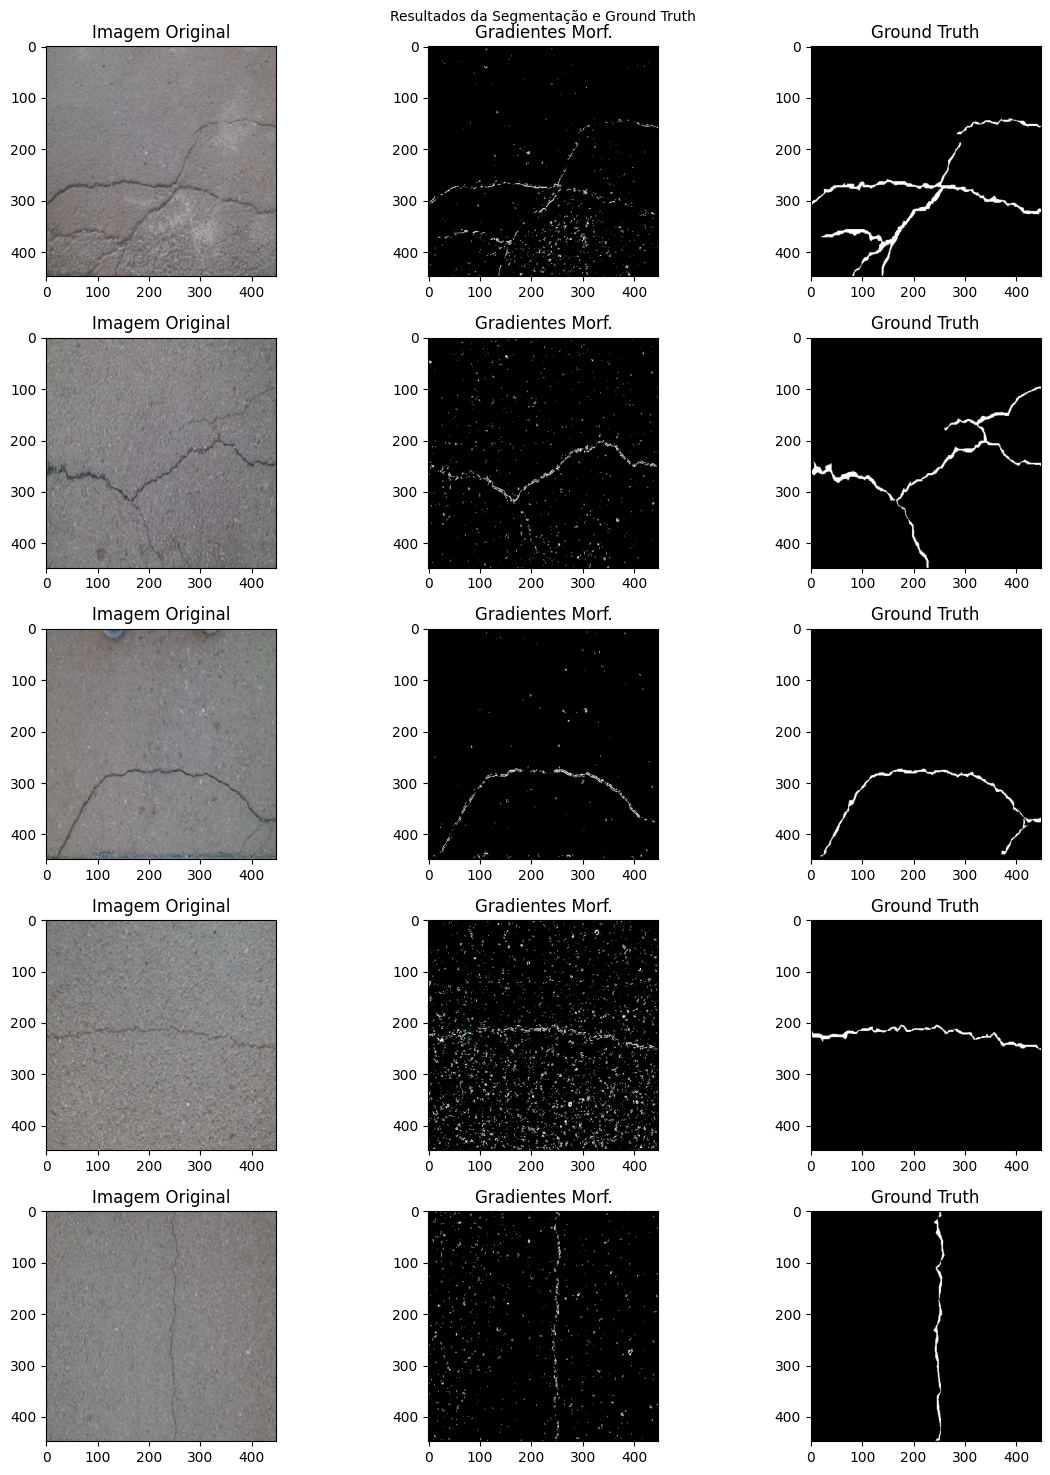

In [ ]:
from skimage.measure import regionprops

#Seleciona 5 índices aleatórios para análise
indices_aleatorios = np.random.choice(len(imagens_originais), size=5, replace=False)

iou_scores = []
miou_total = 0

fig, axs = plt.subplots(5, 3, figsize=(12, 15))

for i, idx in enumerate(indices_aleatorios):
    imagem_original = imagens_originais[idx]
    imagem_resultante = mascaras_morf[idx]
    mascara_ground_truth = ground_truths[idx]

    regiao_resultante = regionprops(imagem_resultante)[0]
    regiao_ground_truth = regionprops(mascara_ground_truth)[0]

    iou = calculate_iou(imagem_resultante, mascara_ground_truth)
    iou_scores.append(iou)

    miou_total += iou

    axs[i, 0].imshow(imagem_original, cmap='gray')
    axs[i, 0].set_title('Imagem Original')

    axs[i, 1].imshow(255-imagem_resultante, cmap='gray')
    axs[i, 1].set_title('Gradientes Morf.')

    axs[i, 2].imshow(mascara_ground_truth, cmap='gray')
    axs[i, 2].set_title('Ground Truth')

miou = miou_total / 5

fig.suptitle('Resultados da Segmentação e Ground Truth', fontsize=10)

plt.tight_layout()

#Mostrar as métricas IoU para as 5 imagens aleatórias
for idx, iou in zip(indices_aleatorios, iou_scores):
    print(f"Imagem {idx+1} - IoU: {iou:.4f}")

print(f"\nmIoU para as 5 imagens aleatórias: {miou:.4f}")

plt.show()

###Comparação KMEANS - GRADIENTES MORFOLÓGICOS

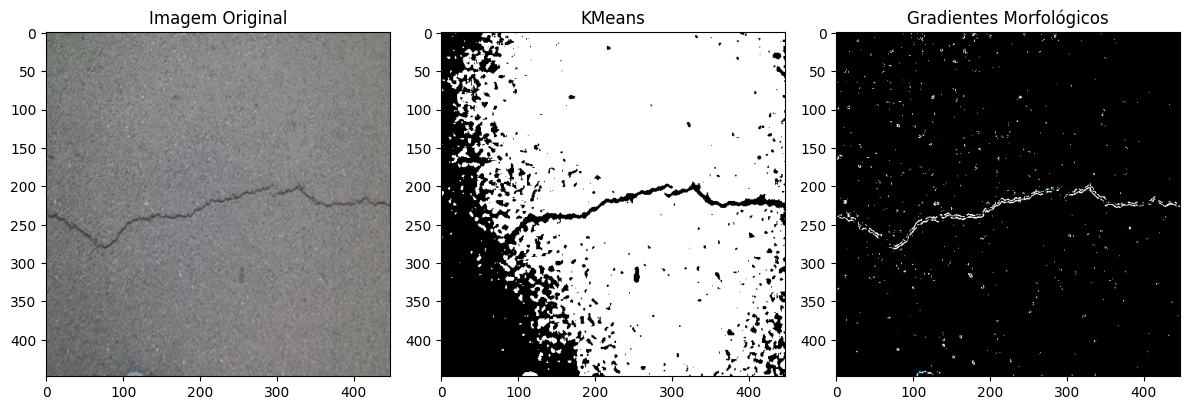

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(imagens_originais[0], cmap='gray')
axs[0].set_title('Imagem Original')

axs[1].imshow(mascaras_kmns[0], cmap='gray')
axs[1].set_title('KMeans')

axs[2].imshow(255-mascaras_morf[0], cmap='gray')
axs[2].set_title('Gradientes Morfológicos')

plt.tight_layout()

plt.show()

In [ ]:
for i in range(len(mascaras_morf)):
    plt.imsave(f'/content/drive/MyDrive/PDI/atividade_7/Dataset/resultados/{names[i]}', 255-mascaras_morf[i])